<a href="https://colab.research.google.com/github/angelaapp28/fall25/blob/main/Copy_of_DeepLearning_Fall2025_hw4_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning (Fall 2025) - Homework 4

---



*Developed by Hongtau Wu & Suzanna Sia*

This notebook contains all starter code for Homework 4. Please read the written assignment carefully to ensure you include all necessary outputs in your final report. Your final submission (a single zip file) should include this notebook (.ipynb file) and a PDF of this notebook with all cell outputs.

## Problem 1a)

### Imports

In [19]:
## External Libararies
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

### Data Loading

In [20]:
## Spectify Path to Provided Data Here
DATA_PATH = '/content/DeepLearning_Fall2025_hw4_prob1_data (1).npy'

## Load Data and Check Dimensionality
data = np.load(DATA_PATH)
Y = data[:,2]
X = data[:,0:2]
print("Y:", Y.shape)
print("X:", X.shape)

## Polygon Boundaries
p = [[[500, 1000], [300, 800], [400, 600], [600, 600], [700, 800]],
     [[500, 600], [100, 400], [300, 200], [700, 200], [900, 400]]]
p = np.asarray(p)
p0 = p[0]
p1 = p[1]

Y: (60000,)
X: (60000, 2)


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Visualization Code

Do not touch any of the visualization code below.

In [22]:
## Helper code for visualisation (No Need to Touch)
def visualize_polygons(p0, p1):
    """

    """
    fig, ax = plt.subplots()
    patches = []
    polygon1 = Polygon(p0, closed=True)
    polygon2 = Polygon(p1, closed=True)
    patches.append(polygon1)
    patches.append(polygon2)
    p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)
    ax.add_collection(p)
    ax.autoscale_view()
    plt.show()

def visualize_datapoints(X, Y):
    """

    """
    assert(X.shape[0] == Y.shape[0])
    fig, ax = plt.subplots()
    npts = 60000
    col = np.where(Y[:npts]==1,'m','b')
    x1 = X[:npts][:,0]
    x2 = X[:npts][:,1]
    ax.scatter(x1, x2, s=0.5, c=col, zorder=1)
    plt.show()

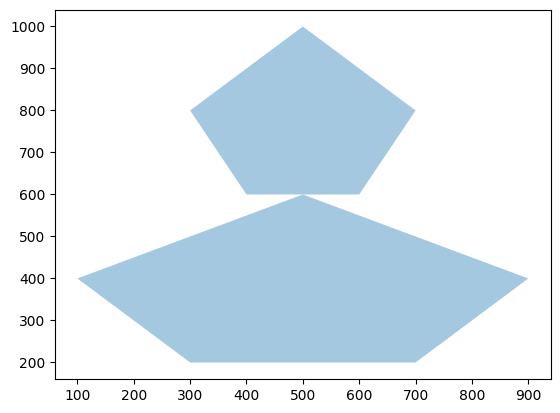

In [23]:
visualize_polygons(p0,p1)

### Problem 1a)

Please fill in all code blocks marked with a #TODO.

In [24]:
def threshold_activation1(x):
    """

    """
    y = np.copy(x)
    y[y <= 0] = 0
    y[y > 0] = 1
    return y


def and_gate(x):
    """
        x: np array of shape (n, 1)
        return: 1 if all elements of x are 1, else 0
    """
    for i in x:
        if i <= 0:
            return 0

    return 1


def or_gate(x):
    """
        x: tuple value from AND gates
    """
    if x[0] <= 0 and x[1] <= 0:
        return 0
    else:
        return 1


def analytical_parameters(p0, p1):
    """

    """
    ## Dimensionality
    x_dim = 2
    class_num = 2
    hidden_unit_num = 10
    # First Layer Parameter
    W = np.zeros((hidden_unit_num, x_dim))
    b = np.zeros((hidden_unit_num, 1))
    for i in range(5):
        # First polygon
        x1 = p0[i, 0]
        y1 = p0[i, 1]
        x2 = p0[(i+1)%5, 0]
        y2 = p0[(i+1)%5, 1]
        W[i, :] = [y1 - y2, x2 - x1]
        b[i, :] = x1 * y2 - x2 * y1
        # Second polygon
        x1 = p1[i, 0]
        y1 = p1[i, 1]
        x2 = p1[(i+1)%5, 0]
        y2 = p1[(i+1)%5, 1]
        W[i + 5, :] = [y1 - y2, x2 - x1]
        b[i + 5, :] = x1 * y2 - x2 * y1
    return W,b

def predict_output_v1(X, W, b):
    """

    """
    predictions = []
    for idx in range(data.shape[0]):
        x = np.reshape(X[idx, :], (2, 1))
        # First layer
        first_layer_output = np.matmul(W, x) + b
        first_layer_output = threshold_activation1(first_layer_output)
        # Second layer
        first_polygon = first_layer_output[0:5, :]
        second_polygon = first_layer_output[5:10, :]
        first_gate_output = and_gate(first_polygon)
        second_gate_output = and_gate(second_polygon)
        # Output layer
        input_to_final_gate = [first_gate_output, second_gate_output]
        prediction = or_gate(input_to_final_gate)
        predictions.append(prediction)
    return predictions

def predict_output_v2(X, W, b):
    """
    """
    ## Cache of Predictions
    predictions = []
    ## Cycle Through Data Points
    for idx in range(data.shape[0]):
        x = np.reshape(X[idx, :], (2, 1))
        # First layer
        first_layer_output = np.matmul(W, x) + b
        first_layer_output = threshold_activation1(first_layer_output)
        # Second layer
        first_polygon = first_layer_output[0:5, :]
        second_polygon = first_layer_output[5:10, :]
        first_gate_output = and_gate(first_polygon)
        second_gate_output = and_gate(second_polygon)
        # Output layer
        input_to_final_gate = [first_gate_output, second_gate_output]
        prediction = first_gate_output
        predictions.append(prediction)
    return predictions

def calc_accuracy(true_y, pred_y):
    """

    """
    true_prediction_num = 0
    for i, py in enumerate(pred_y):
        if py == true_y[i]:
            true_prediction_num += 1
    accuracy = true_prediction_num / len(pred_y)
    print("Accuracy: ", accuracy)
    return accuracy

*Sanity check:* If you correctly implemented the 'and gate' and 'or gate', all points should be classified correctly when you make predictions using `predict_output_v1()`

Accuracy:  1.0


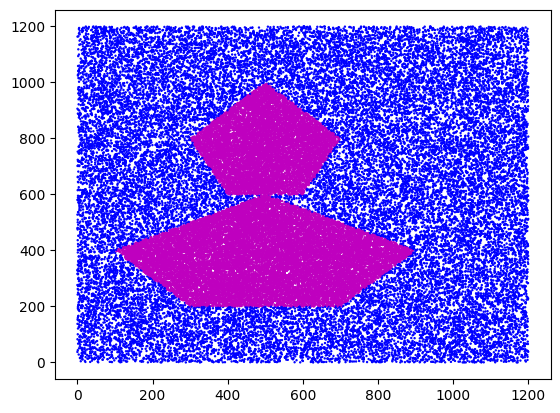

In [25]:
## Load Our Parameters
W, b = analytical_parameters(p0, p1)

## Make Predictions
pred_Y = predict_output_v1(X, W, b)

## Compute Accuracy
acc = calc_accuracy(Y, pred_Y)
assert (acc == 1)

## Visualize Predictions
visualize_datapoints(X, np.array(pred_Y))

In the code above, change the gates in `predict_output_v2()` such that only the points in the top polygon are classified correctly. Visualize your result, report the accuracy of this model, and attach it to the submission.

To further clarify, you should **only** change the usage of the gating functions, not the code inside the gating function itself.

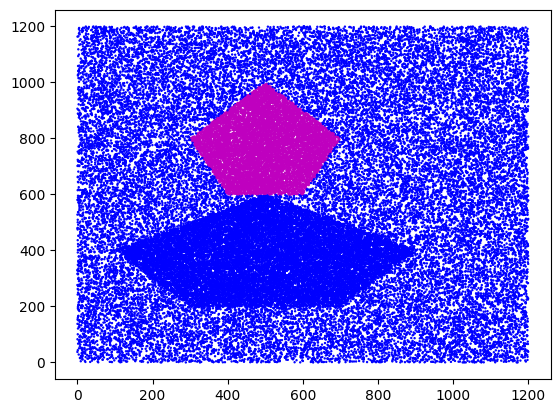

In [26]:
## Load Our Parameters
W, b = analytical_parameters(p0, p1)

## Make Predictions
pred_Y = predict_output_v2(X, W, b)

## Visualize Predictions
visualize_datapoints(X, np.array(pred_Y))

## Problem 1b-d)

Complete problems 1b through 1d in the space below. Please use markdown to clearly distinguish your answers for each part. Include appropriate visualizations generated here in your final report.

Problem 1.b

In [27]:
import torch
import torch.nn as nn

# problem 1.b


class MLP1(nn.Module):
  def __init__(self):
    super().__init__()

    self.first_layer = nn.Linear(2, 10)
    self.second_layer = nn.Linear(10, 2)
    self.output = nn.Linear(2, 1)
    self.activation = nn.Sigmoid()

    for layer in [self.first_layer, self.second_layer, self.output]:
      nn.init.xavier_uniform_(layer.weight)

  def forward(self, x):
    x = self.activation(self.first_layer(x))
    x = self.activation(self.second_layer(x))
    x = self.activation(self.output(x))

    return x


In [28]:
def accuracy(y_hat, y):
  prediction = (y_hat > 0.5).float()
  return (prediction == y).float().mean().item()

In [29]:
import numpy as np
import torch
import torch.nn as nn

def train(model, x, y, test_x, test_y, loss_function, accuracy_function, batch_size = 128, max_epochs = 500, lr = 0.01):
  loss_function = nn.BCELoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)

  if isinstance(x, np.ndarray):
    x = torch.FloatTensor(x)

  if isinstance(y, np.ndarray):
    y = torch.FloatTensor(y)

  if isinstance(test_x, np.ndarray):
    test_x = torch.FloatTensor(test_x)

  if isinstance(test_y, np.ndarray):
    test_y = torch.FloatTensor(test_y)

  if batch_size is None:
    batch_size = len(x)

  dataset = torch.utils.data.TensorDataset(x, y)
  dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

  losses = []
  accuracies = []
  test_accuracy = []

  for epoch in range(max_epochs):
    model.train()
    epoch_loss = 0
    epoch_acc = 0

    for batch_x, batch_y in dataloader:

      y_hat = model(batch_x)
      loss = loss_function(y_hat, batch_y)
      acc = accuracy_function(y_hat, batch_y)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      epoch_loss += loss.item()
      epoch_acc += acc

    accuracies.append(epoch_acc / len(dataloader))
    losses.append(epoch_loss / len(dataloader))


    avg_loss = epoch_loss / len(dataloader)
    avg_acc = epoch_acc / len(dataloader)

    # evaluation

    model.eval()
    with torch.no_grad():
      test_prediction = (model(test_x) > 0.5).float()
      test_acc = (test_prediction.eq(test_y).sum().item()) / len(test_y)
      test_accuracy.append(test_acc)


    if epoch % 100 == 0 or epoch == max_epochs - 1:

      print("iteration",epoch,"loss:", avg_loss, "accuracy:",avg_acc)



  fig0=plt.figure(0)
  plt.plot(losses,'-')
  plt.xlabel('Iteration', fontsize=18)
  plt.ylabel('Loss', fontsize=16)
  plt.show()
  fig1=plt.figure(1)
  plt.plot(accuracies,'-')
  plt.xlabel('Iteration', fontsize=18)
  plt.ylabel('Accuracy', fontsize=16)
  plt.show()

  return losses, accuracies, test_accuracy

iteration 0 loss: 0.6946417628346807 accuracy: 0.5019781010230179
iteration 100 loss: 0.42764151950016654 accuracy: 0.8495923913348361
iteration 200 loss: 0.3118399225003884 accuracy: 0.8803029092376494
iteration 300 loss: 0.28043249356167393 accuracy: 0.889370204542604
iteration 400 loss: 0.19078567989951814 accuracy: 0.940417199488491
iteration 499 loss: 0.172011297262843 accuracy: 0.9431106138717184


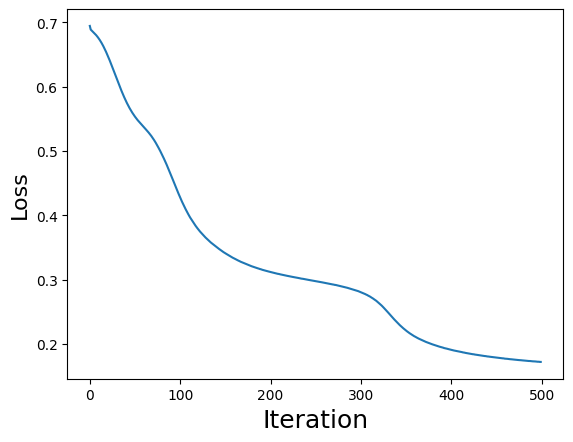

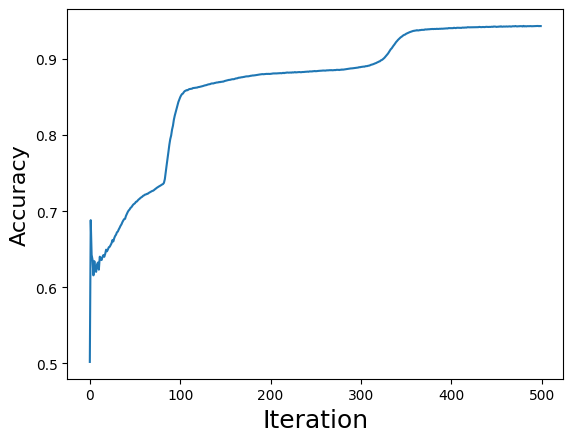

iteration 0 loss: 0.7089123027708829 accuracy: 0.4994924871817879
iteration 100 loss: 0.47821896620418713 accuracy: 0.7528692454938084
iteration 200 loss: 0.31398563220372894 accuracy: 0.8813259270794861
iteration 300 loss: 0.1883832495040296 accuracy: 0.9408128197540713
iteration 400 loss: 0.1682786973922149 accuracy: 0.9440417199793374
iteration 499 loss: 0.16127952754192645 accuracy: 0.944804987181788


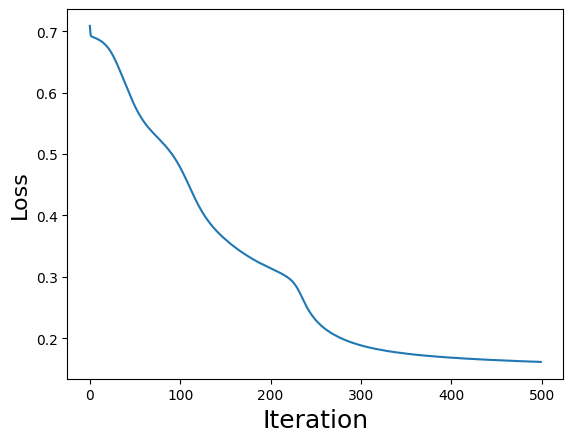

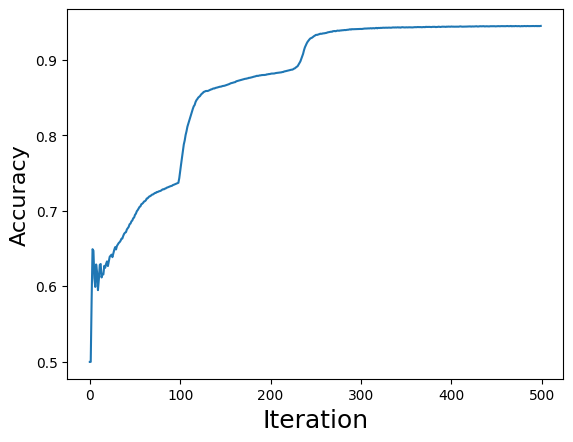

iteration 0 loss: 0.6903652778976713 accuracy: 0.45629795394895023
iteration 100 loss: 0.5211710249219099 accuracy: 0.7281529731152917
iteration 200 loss: 0.5097504376298021 accuracy: 0.731210038332683
iteration 300 loss: 0.4851026400123411 accuracy: 0.752409686670279
iteration 400 loss: 0.32859470777194516 accuracy: 0.8735054347216321
iteration 499 loss: 0.20607088144173097 accuracy: 0.9358335997137572


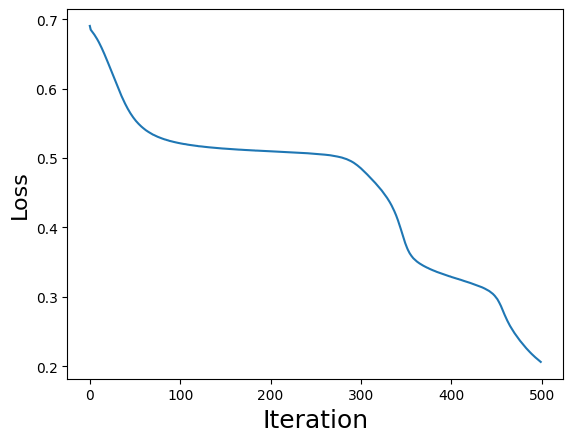

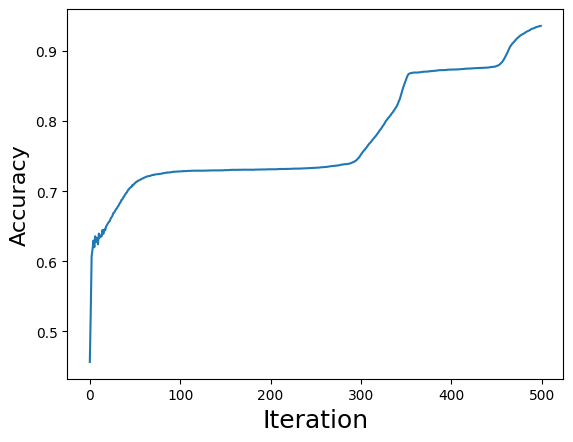

iteration 0 loss: 0.6980606000441725 accuracy: 0.4996123720922738
iteration 100 loss: 0.42730642500740795 accuracy: 0.8441695971867008
iteration 200 loss: 0.2435323448132371 accuracy: 0.9236612851967287
iteration 300 loss: 0.177022125505273 accuracy: 0.9419357416879796
iteration 400 loss: 0.16284564105064972 accuracy: 0.9452725383631714
iteration 499 loss: 0.1561151186904639 accuracy: 0.9466192455547849


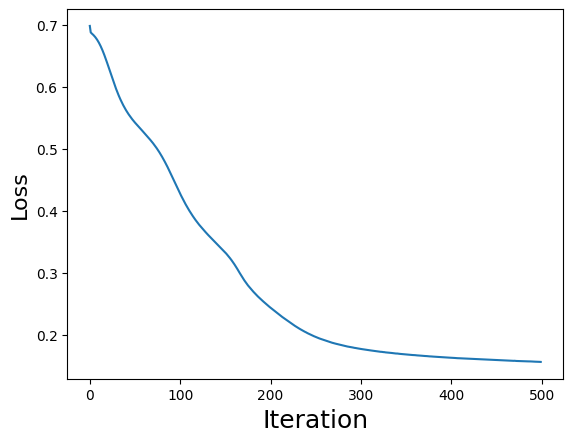

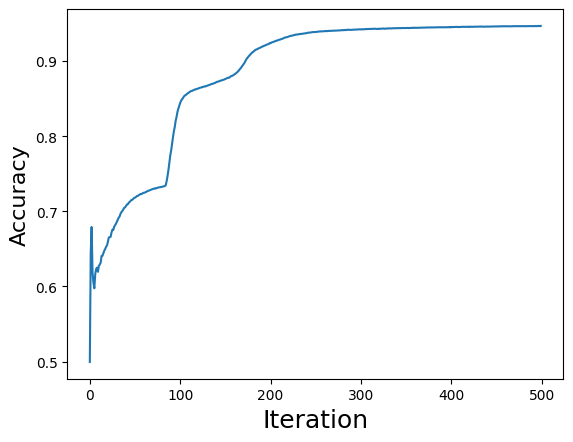

iteration 0 loss: 0.8328662964389147 accuracy: 0.5003636509103848
iteration 100 loss: 0.5187897253066988 accuracy: 0.7280930306600488
iteration 200 loss: 0.35148161546805934 accuracy: 0.8641224424247547
iteration 300 loss: 0.18725425519449326 accuracy: 0.9405850383936597
iteration 400 loss: 0.15970911133243604 accuracy: 0.9461636828339618
iteration 499 loss: 0.1492885085170531 accuracy: 0.9482257033857848


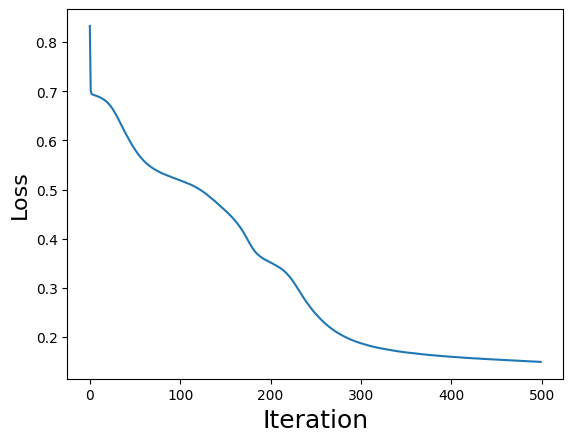

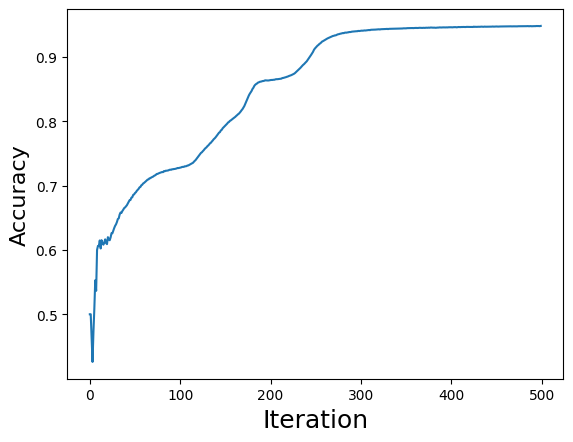

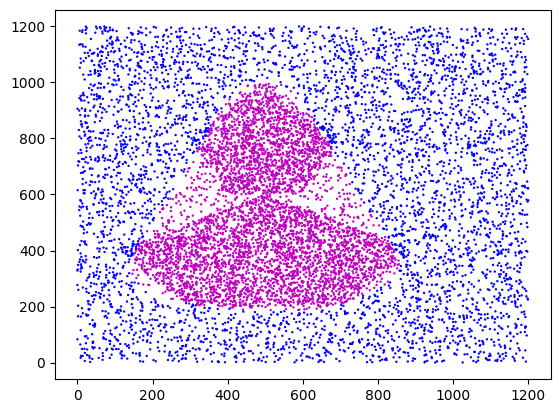

'\n\nfinal_train_accs = [r[1][-1] for r in results]\nfinal_test_accs = [r[2][-1] for r in results]\n\nprint(f"Mean Train Acc: {np.mean(final_train_accs):.4f} ± {np.std(final_train_accs):.4f}")\nprint(f"Mean Test Acc:  {np.mean(final_test_accs):.4f} ± {np.std(final_test_accs):.4f}")\n'

In [30]:
mean = X.mean(axis = 0)
std = X.std(axis = 0)
x_norm = (X - mean) / std


x_train, x_test = x_norm[:50000], x_norm[50000:]
y_train, y_test = Y[:50000], Y[50000:]


X_train = torch.tensor(x_train, dtype=torch.float32)
Y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(x_test, dtype=torch.float32)
Y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

seeds = [0, 1, 2, 3, 4]
results = []


train_accuracy, test_accuracy = [], []

for seed in seeds:
  torch.manual_seed(seed)
  model = MLP1()

  losses, train_accs, test_accs = train(
        model,
        X_train, Y_train,
        X_test, Y_test,
        nn.BCELoss(),
        accuracy,
        batch_size=128,
        max_epochs=500,
        lr=0.01
    )
  results.append((losses, train_accs, test_accs))


with torch.no_grad():
    preds = (model(torch.FloatTensor(x_test)) > 0.5).numpy().astype(int).flatten()

visualize_datapoints(x_test * std + mean, preds)  # rescale back to original coords


In [31]:
import torch
import torch.nn as nn


class MLP2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layers = nn.Sequential(
            nn.Linear(2, 32),
            nn.Sigmoid(),
            nn.Linear(32, 16),
            nn.Sigmoid(),
            nn.Linear(16, 8),
            nn.Sigmoid(),
            nn.Linear(8, 4),
            nn.Sigmoid(),
            nn.Linear(4, 1),
            nn.Sigmoid()
    )

    for layer in self.layers:
        if isinstance(layer, nn.Linear):
            nn.init.xavier_uniform_(layer.weight)

  def forward(self, x):
    return self.layers(x)


iteration 0 loss: 0.7259209811535028 accuracy: 0.49960038363171355
iteration 100 loss: 0.6929038144133585 accuracy: 0.5470588234684352
iteration 200 loss: 0.6914460976105516 accuracy: 0.5859015344658776
iteration 300 loss: 0.5532797876069003 accuracy: 0.7170436380769286
iteration 400 loss: 0.37629192221500074 accuracy: 0.8424272698819485
iteration 499 loss: 0.3099279868633241 accuracy: 0.8739929667214299


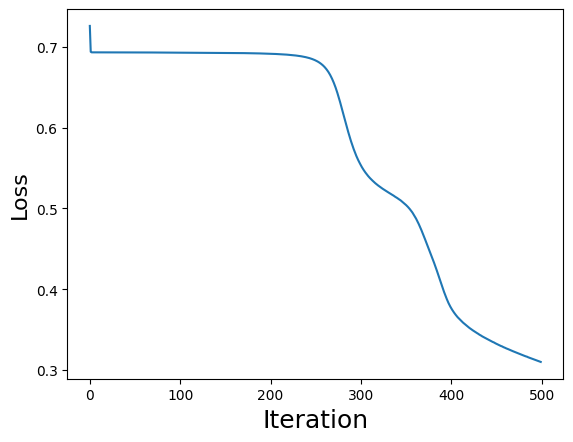

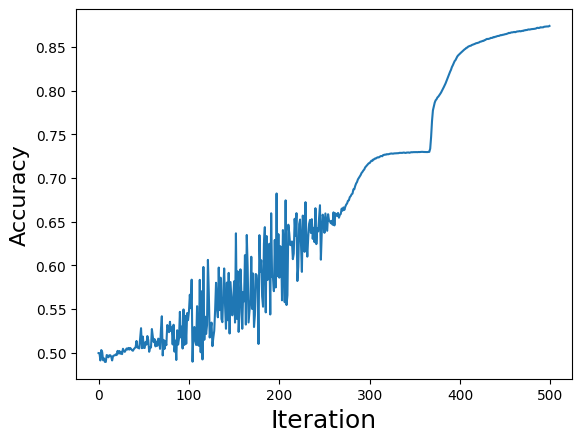

iteration 0 loss: 0.7315331342275185 accuracy: 0.49951646417912926
iteration 100 loss: 0.6930552359737093 accuracy: 0.5037044437645036
iteration 200 loss: 0.6927621960639954 accuracy: 0.5115888746803069
iteration 300 loss: 0.6902221714139289 accuracy: 0.5877717391914113
iteration 400 loss: 0.5275021785360468 accuracy: 0.7276254794786653
iteration 499 loss: 0.509228668783022 accuracy: 0.7288003516624041


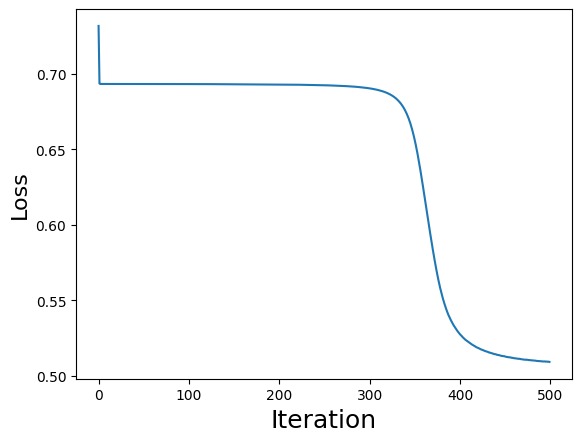

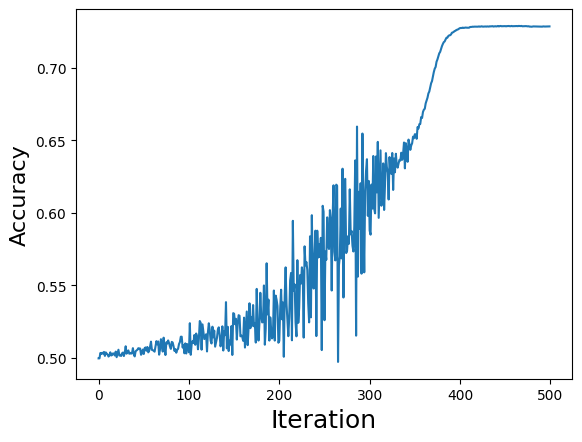

iteration 0 loss: 0.6931912696270077 accuracy: 0.49584398976982097


KeyboardInterrupt: 

In [32]:
mean = X.mean(axis = 0)
std = X.std(axis = 0)
x_norm = (X - mean) / std


x_train, x_test = x_norm[:50000], x_norm[50000:]
y_train, y_test = Y[:50000], Y[50000:]


X_train = torch.tensor(x_train, dtype=torch.float32)
Y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(x_test, dtype=torch.float32)
Y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

seeds = [0, 1, 2, 3, 4]
results = []


train_accuracy, test_accuracy = [], []

for seed in seeds:
  torch.manual_seed(seed)
  model = MLP2()

  losses, train_accs, test_accs = train(
        model,
        X_train, Y_train,
        X_test, Y_test,
        nn.BCELoss(),
        accuracy,
        batch_size=128,
        max_epochs=500,
        lr=0.01
    )
  results.append((losses, train_accs, test_accs))

plt.figure(figsize=(12,5))
for i, (losses, train_accs, test_accs) in enumerate(results):
  plt.subplot(1,2,1)
  plt.plot(losses, label=f'Seed {i}')
  plt.title('Training Loss')
  plt.subplot(1,2,2)
  plt.plot(test_accs, label=f'Seed {i}')
  plt.title('Test Accuracy')
plt.legend()
plt.show()


with torch.no_grad():
    preds = (model(torch.FloatTensor(x_test)) > 0.5).numpy().astype(int).flatten()

visualize_datapoints(x_test * std + mean, preds)  # rescale back to original coords


"""

final_train_accs = [r[1][-1] for r in results]
final_test_accs = [r[2][-1] for r in results]

print(f"Mean Train Acc: {np.mean(final_train_accs):.4f} ± {np.std(final_train_accs):.4f}")
print(f"Mean Test Acc:  {np.mean(final_test_accs):.4f} ± {np.std(final_test_accs):.4f}")
"""

## Problem 2

All code for Problem 2 should go below. We provide data loaders and relevant imports to get you started. If you are working locally (instead of using Google Colab), we recommend using Conda to install pytorch (https://pytorch.org).

### Imports

In [ ]:
## Additional External Libraries (Deep Learning)
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as tfs
from PIL import Image
from torchvision.datasets import FashionMNIST
from torch.utils.data import SubsetRandomSampler

### Data Loading

In [ ]:
# Hyperparameter (Feel Free to Change These, but Make Sure your Training Loop Still Works as Expected)
TRAIN_BATCH_SIZE = 50
VAL_BATCH_SIZE = 50
TEST_BATCH_SIZE = 1

# Transform data to PIL images
transforms = tfs.Compose([tfs.ToTensor()])

# Train/Val Subsets
train_mask = range(50000)
val_mask = range(50000, 60000)

# Download/Load Dataset
train_dataset = FashionMNIST('./data', train=True, transform=transforms, download=True)
test_dataset = FashionMNIST('./data', train=False, transform=transforms, download=True)

# Data Loaders
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, sampler=SubsetRandomSampler(train_mask))
val_dataloader = DataLoader(train_dataset, batch_size=VAL_BATCH_SIZE, sampler=SubsetRandomSampler(val_mask))
test_dataloader = DataLoader(test_dataset, batch_size=TEST_BATCH_SIZE)

## Problem 2a)

### Design Model

In [ ]:
class CNNet(nn.Module):

    """

    """

    def __init__(self):
        """

        """
        ## Inherent Torch Module
        super(CNNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)  # 2x2 max pooling
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1)

        self.fc1 = nn.Linear(16*7*7, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """

        """
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

### Model Training

In [ ]:
def train(model,
          optimizer,
          loss,
          lr,
          epochs=50,
          train_dataloader=train_dataloader,
          val_dataloader=val_dataloader,
          test_dataloader=test_dataloader,
          **kwargs):


  optimizer = optimizer(model.parameters(), lr=lr)
  train_losses, val_accuracies = [], []

  for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_dataloader:
            inputs = inputs.cuda()
            labels = labels.cuda()

            optimizer.zero_grad()

            outputs = model(inputs)
            outputs = outputs.squeeze(1)

            l = loss(outputs, labels.float())

            l.backward()
            optimizer.step()

            running_loss += l.item()

        avg_loss = running_loss / len(train_dataloader)
        train_losses.append(avg_loss)

        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for val_inputs, val_labels in val_dataloader:
                val_inputs = val_inputs.cuda()
                val_labels = val_labels.cuda()

                outputs = model(val_inputs).squeeze(1)
                predicted = (outputs > 0.5).long()
                total += val_labels.size(0)
                correct += (predicted == val_labels).sum().item()

        val_acc = correct / total
        val_accuracies.append(val_acc)


In [ ]:
## Hyperparameters
EPOCH = 50
LR = 0.01

## Setting up the model, optimizer, and loss function
model = CNNet()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_f = nn.CrossEntropyLoss

In [ ]:
## Run Training Loop
out = train(model, optimizer, loss_f, LR)

## Problem 2b)

Now try to improve your model using additional techniques learned during class. You should be able to use the same training function as above, but will need to create a new model architecture.

### Data Loading

You should maintain the splits from above, but feel free to alter the dataloaders (i.e. transforms) as you wish.

In [ ]:
# Hyperparameter (Feel Free to Change These, but Make Sure your Training Loop Still Works as Expected)
TRAIN_BATCH_SIZE = 50
VAL_BATCH_SIZE = 50
TEST_BATCH_SIZE = 1

# Transform data to PIL images
transforms = ##TODO: Use the same from above or consider alternatives

# Train/Val Subsets
train_mask = range(50000)
val_mask = range(50000, 60000)

# Download/Load Dataset
train_dataset = FashionMNIST('./data', train=True, transform=transforms, download=True)
test_dataset = FashionMNIST('./data', train=False, transform=transforms, download=True)

# Data Loaders
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, sampler=SubsetRandomSampler(train_mask))
val_dataloader = DataLoader(train_dataset, batch_size=VAL_BATCH_SIZE, sampler=SubsetRandomSampler(val_mask))
test_dataloader = DataLoader(test_dataset, batch_size=TEST_BATCH_SIZE)

### Model Design

In [ ]:
##TODO: Try to improve upon your previous architecture

### Model Training

In [ ]:
##TODO: Fit and evaluate your model. What do you observe?

## Problem 2c)

Write down your response in the final report.